# Transformada de Hough para círculos (Pedrini)

Ilustração do uso da CHT com o módulo _scikit image_.

In [1]:
from skimage.data import coins
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.transform import hough_circle_peaks, hough_circle
from skimage.filters import sobel
import numpy as np
from skimage.morphology import binary_opening, binary_closing
from skimage import color
from skimage.draw import circle_perimeter

In [2]:
image = imread('quadro.png')
image = color.rgb2gray (image)

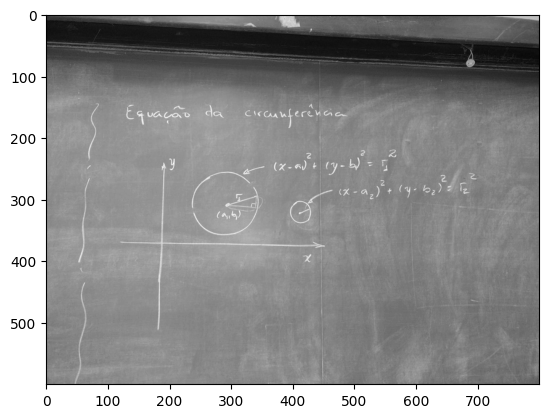

In [3]:
plt.imshow(image,cmap='gray')

### Extração de bordas
A circunferência é a borda do círculo, então, o emprego de um gradiente é um passo preparatório necessário para a chamada da CHT.

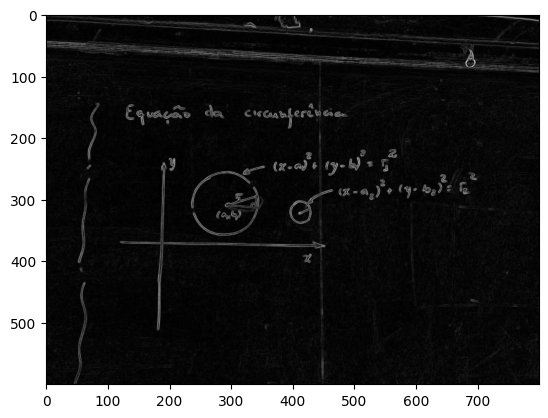

In [4]:
edges = sobel (image)
plt.imshow(edges,cmap='gray')

### Binarização
Como a CHT opera sobre imagens binárias, é necessário realizar a limiarização do _input_. Isto pode ser feito antes ou após o emprego do gradiente. Neste exemplo, a limiarização corresponde ao primeiro passo.

In [5]:
h = np.histogram (edges.ravel(),bins=256)

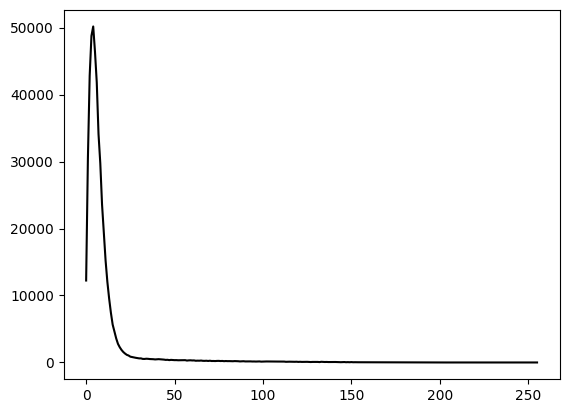

In [6]:
plt.plot (h[0],'-k')

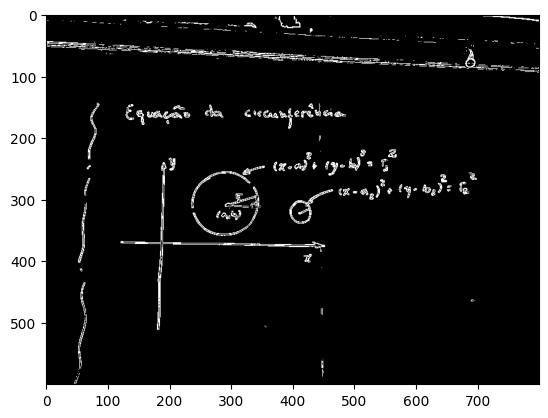

In [7]:
binary=edges.copy()
limiar = image.max()*(25/256)
binary[binary<=limiar]=0
binary[binary>0]=1
plt.imshow(binary*255,cmap='gray')

### Emprego de operadores morfológicos

A abertura e fechamento são aplicadas para remover grãos e buracos, tornando a imagem binária mais homogênea.

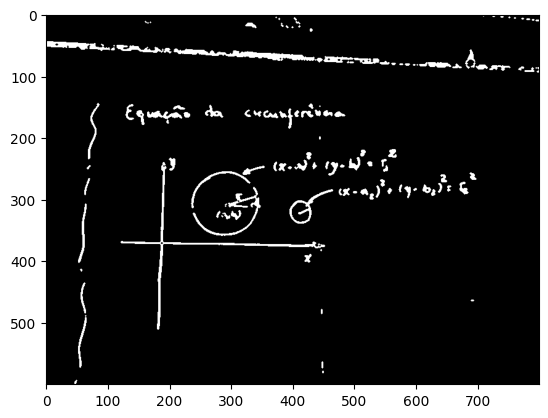

In [10]:
binary = binary_closing (binary)
binary = binary_opening (binary)
plt.imshow (binary,cmap='gray')

### Chamada da CHT
Como a CHT gera uma grade em 3D, os valores dos raios também são parâmetros da função

In [19]:
raios = [50]
hough_grade = hough_circle (binary, raios)

### Desenho da grade de acumuladores para um r fixado

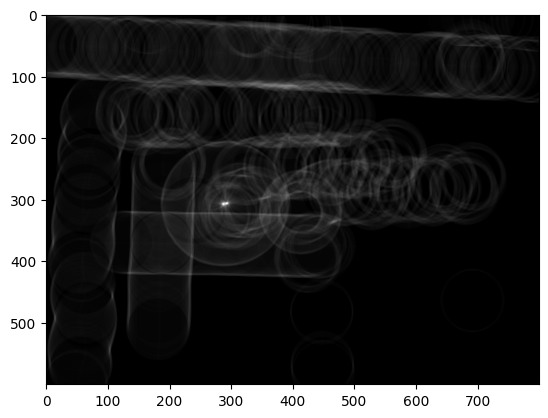

In [21]:
grade = hough_grade[0]   # raio = 75
plt.imshow (grade,cmap='gray')

### Obtenção dos centros
Uma filtragem para obtenção das circunferências mais importantes é aplicada com base numa função auxiliar que seleciona apenas os picos da CHT.

In [22]:
acumuladores, a, b, raio = hough_circle_peaks (hough_grade, raios, total_num_peaks=3)

### Desenho das circunferências
Passo ilustrativo para apresentar o resultado da computação realizada.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


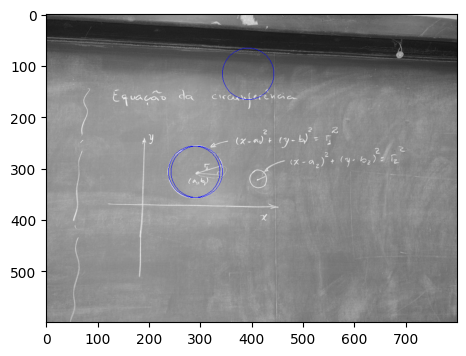

In [23]:
# desenho da figura
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image_color = color.gray2rgb(image)
for center_y, center_x, radius in zip(b, a, raio):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image_color[circy, circx] = (0, 0, 220)

ax.imshow(image_color, cmap=plt.cm.gray)